<a href="https://colab.research.google.com/github/Kanabee/Learning_ML/blob/main/AD_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (r2_score ,
                                        mean_squared_error ,
                                        mean_absolute_error ,
                                        mean_absolute_percentage_error)

np.random.seed(42)


Read Data

In [4]:
data = pd.read_csv("ad_dataset.csv")
data

,spend,clicks,impressions,display,transactions,ctr,con_rate,revenue
0,22.61,165,8672,0,2,1.90,1.21,58.88
1,37.28,228,11875,0,2,1.92,0.88,44.92
2,55.57,291,14631,0,3,1.99,1.03,141.56
3,45.42,247,11709,0,2,2.11,0.81,209.76
4,50.22,290,14768,0,3,1.96,1.03,197.68
5,33.05,172,8698,0,2,1.98,1.16,204.36
6,12.88,68,2924,0,1,2.33,1.47,117.32
7,23.87,112,5919,0,1,1.89,0.89,72.04
8,58.38,306,14789,0,3,2.07,0.98,290.40
9,48.16,300,14818,0,3,2.02,1.00,245.52


Clean Data

1.Handle missing Value

2.Hanedle outliner

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   spend         40 non-null     float64
 1   clicks        40 non-null     int64  
 2   impressions   40 non-null     int64  
 3   display       40 non-null     int64  
 4   transactions  40 non-null     int64  
 5   ctr           40 non-null     float64
 6   con_rate      40 non-null     float64
 7   revenue       40 non-null     float64
dtypes: float64(4), int64(4)
memory usage: 2.6 KB


In [6]:
data.describe()

,spend,clicks,impressions,display,transactions,ctr,con_rate,revenue
count,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000
mean,48.145750,284.225000,11822.325000,0.50000,3.575000,2.497250,1.297500,268.555000
std,22.679736,139.346918,6288.169345,0.50637,1.838164,0.518909,0.324691,150.873933
min,1.120000,48.000000,1862.000000,0.00000,1.000000,1.890000,0.810000,16.160000
25%,32.667500,176.500000,7288.500000,0.00000,2.000000,1.997500,1.025000,181.130000
50%,48.235000,287.000000,10821.500000,0.50000,3.000000,2.455000,1.325000,273.140000
75%,63.590000,356.250000,14796.250000,1.00000,4.000000,3.055000,1.490000,353.930000
max,91.510000,593.000000,29324.000000,1.00000,9.000000,3.290000,2.080000,707.280000


Train Test Split

In [7]:
target_name = "revenue"
feature_name = list(data.columns.drop(target_name))

In [8]:
target_name

'revenue'

In [9]:
feature_name

['spend',
 'clicks',
 'impressions',
 'display',
 'transactions',
 'ctr',
 'con_rate']

In [11]:
X = data[feature_name]
y = data[target_name]

In [ ]:
X

In [ ]:
y

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, shuffle=True)



In [59]:
X_train

,spend,clicks,impressions,display,transactions,ctr,con_rate
16,81.05,473,23621,0,5,2.00,1.06
34,13.01,106,4056,1,2,2.61,1.89
2,55.57,291,14631,0,3,1.99,1.03
28,23.04,126,3828,1,2,3.29,1.59
7,23.87,112,5919,0,1,1.89,0.89
11,81.28,533,26411,0,5,2.02,0.94
6,12.88,68,2924,0,1,2.33,1.47
14,64.82,405,20671,0,4,1.96,0.99
27,1.12,48,1862,1,1,2.58,2.08
19,36.34,238,11855,0,2,2.01,0.84


Created Model

In [60]:
reg = LinearRegression()
reg.fit(X_train,y_train)

reg.intercept_

-206.2358978050782

In [61]:
reg.coef_

array([-4.64009888e+00,  4.76040542e+00, -4.50489847e-02, -8.97803222e+01,
       -9.72801379e+01,  4.79859760e+01,  1.08399568e+02])

Prediction

In [62]:
y_pred_train = reg.predict(X_train)

In [63]:
y_pred_test = reg.predict(X_test)

Model Evaluation

1.Scoring

In [64]:
print('r_score = \t\t\t', r2_score(y_train,y_pred_train))
print('mean_square_error =\t\t', mean_squared_error(y_train,y_pred_train))
print('mean_absolute_error =\t\t', mean_absolute_error(y_train,y_pred_train))
print('mean_absolute_percentage_error = ', mean_absolute_percentage_error(y_train,y_pred_train))

r_score = 			 0.8486724492319229
mean_square_error =		 4528.6418771313965
mean_absolute_error =		 56.74627094626099
mean_absolute_percentage_error =  0.6101736115004892


In [65]:
from math import sqrt
mse = mean_squared_error(y_train,y_pred_train)
rmse = sqrt(mse)
print('root_mean_square_error = ' ,rmse)

root_mean_square_error =  67.29518465039973


Text(0, 0.5, 'Actual')

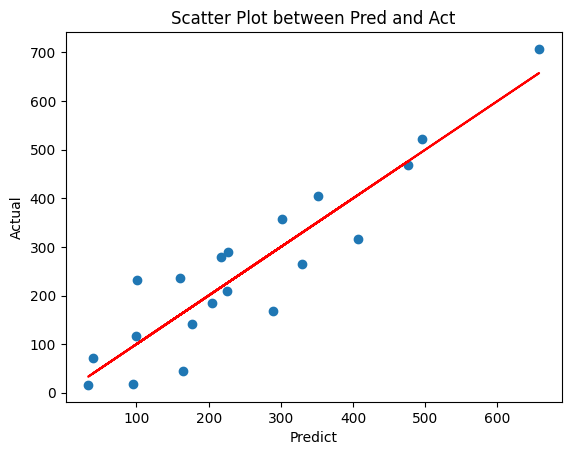

In [66]:
plt.scatter(y_pred_train,y_train)
plt.plot(y_pred_train,y_pred_train,color ='red')

plt.title('Scatter Plot between Pred and Act')
plt.xlabel('Predict')
plt.ylabel('Actual')

Test

In [67]:
print('r_score = \t\t\t', r2_score(y_test,y_pred_test))
print('mean_square_error =\t\t', mean_squared_error(y_test,y_pred_test))
print('mean_absolute_error =\t\t', mean_absolute_error(y_test,y_pred_test))
print('mean_absolute_percentage_error = ', mean_absolute_percentage_error(y_test,y_pred_test))

r_score = 			 0.3731102280711751
mean_square_error =		 8750.525163037
mean_absolute_error =		 80.52576389453128
mean_absolute_percentage_error =  0.3633787977868132


In [68]:
mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = sqrt(mse)
print('root_mean_square_error = ' ,rmse_test)

root_mean_square_error =  67.29518465039973


Text(0, 0.5, 'Actual')

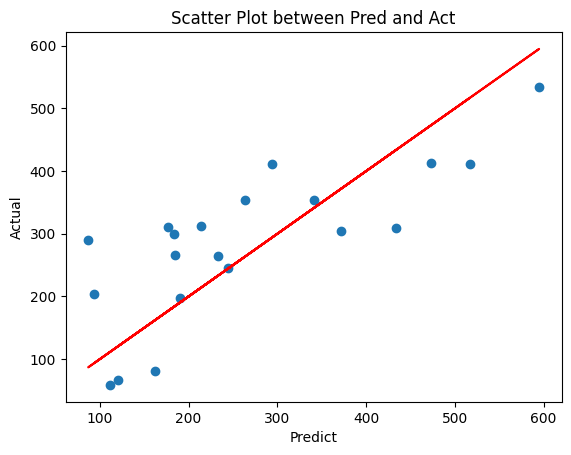

In [69]:
plt.scatter(y_pred_test,y_test)
plt.plot(y_pred_test,y_pred_test,color ='red')

plt.title('Scatter Plot between Pred and Act')
plt.xlabel('Predict')
plt.ylabel('Actual')

Model Deployment


In [70]:
import pickle

In [71]:
pickle.dump((reg, feature_name), open('AD_Performance.pickle', 'wb'))

Model

In [75]:
saved_model = pickle.load(open('AD_Performance.pickle', 'rb'))

In [76]:
reg = saved_model[0]
feature_name = saved_model[1]

In [77]:
feature_name

['spend',
 'clicks',
 'impressions',
 'display',
 'transactions',
 'ctr',
 'con_rate']

In [78]:
spend = 42.61
clicks = 288
impressions = 9748
display = 1
transactions = 4
ctr = 2.95
con_rate = 1.39

In [80]:
incoming_data = pd.DataFrame(np.array([[spend, clicks, impressions, display,
                                        transactions, ctr, con_rate]]),
                             columns=feature_name)

incoming_data

,spend,clicks,impressions,display,transactions,ctr,con_rate
0,42.61,288.0,9748.0,1.0,4.0,2.95,1.39


In [81]:
predicted_target = reg.predict(incoming_data)

In [82]:
predicted_target

array([341.24190219])